Predict if a tweet refers to a disaster with NLP
-----------------------------

![disaster](natural-disasters.jpg)

If a disaster happen on the world (somewhere), people begin to send messages on twitter or on other social medias. Those messages are collected plus others that don't talk about disaster. Then with the new natural language processing (nlp) methods we can make complex computations to differentiate each tweet and classify it easily with a created model (neural network, decision tree, regression model, ...). We will use in our task a neural network model and some deep nlp preprocessing. Let's identify, first, what will be the different parts of our notebook:

- Exploratory Data Analysis 
1. What is the shape of the Data frame ?
2. Does it contains null data or duplicated data ?
3. What columns will interest us ?
4. Does the data contains outliers or incoherences ?
5. Does the data contains to short or to long tweets and are they outliers ?
6. Can we say that the classes are unbanlanced ?
7. Can we guess easily the class of some tweets ?
8. Can we detect some patterns or key words in the tweets ?
9. What will the accuracy score that a human would know if they manually predict the data ? 
- Text Processing
1. Write a function which will help use tokenizing the tweets, deleting stop words, removing tokens with more than 3 letters,
2. How will we create the corpus (i.e a text containing all the documents)
3. If we obtain the corpus, how many unique tokens will we have? That number of tokens do it seems too small or to large to you?
4. How to reduce that number of unique tokens, or in other words "How to reduce the size of the vocabulary" in that corpus?
5. How many tokens are seen one time in the corpus? Those tokens do they interest us?
6. Do a stemming method will help us to reduce the dimensionality of the corpus?
7. How to graphically visualize, with the help of a WordCloud, for example, the most present tokens in the corpora ?
8. How we can apply every previous processes to create a new must pertinent column "text"?   

In [1]:
# import the necessary
from nlp_project import *

# let's modify the pandas options to display more observations with the head method
pd.options.display.max_rows = 100

### EDA (Exploratory Data Analysis)

#### Identify the shape of the data

Let's import the dataset. We will focus only on the training set for the moment.

In [2]:
train_set = pd.read_csv('nlp_project/data/kaggle_tweet_competition/train.csv')

We will use a copy of the original data to avoid missing the latter.

In [3]:
train_set_ = train_set.copy()

Let's print the shape.

In [4]:
train_set_.shape

(7613, 5)

It contains 7613 observations and 5 variables.

### Missing data and duplications

Let's identify the missing data with graphic and percentages.

In [5]:
null_data = train_set_.isnull()

Let's make a heat map to visualize the proportions

<AxesSubplot: >

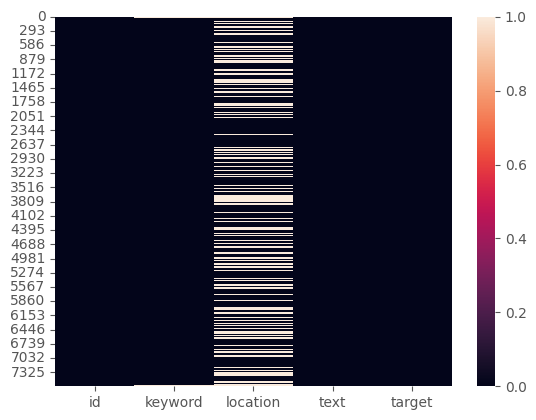

In [6]:
sns.heatmap(null_data)

We don't see clearly the percentages so let's plot them.

In [7]:
null_percentages = null_data.sum(axis=0)*100 / null_data.shape[0] 

In [8]:
null_percentages

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

<AxesSubplot: >

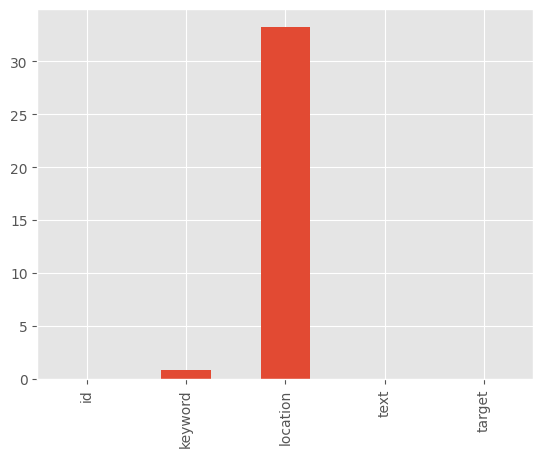

In [9]:
null_percentages.plot(kind="bar")

The location column contains 33% (the most important percentage) of missing data and the keyword column contains 0.8% of missing data.

Let's identify the duplications (by lines).

In [10]:
train_set_.duplicated().sum()

0

The sum of duplicated observations is equal to 0.

#### Columns of interest

Let's look at the columns by printing the first lines,

In [11]:
train_set_.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


and the last lines.

In [12]:
train_set_.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


We notice some interesting things:
- Some columns may not interest us which are keyword and location. Location contains 33% of missing values so it is important to remove it from the data. 
- The id column add a too great variance on the data because it identify uniquely each column which is already done by the index value. We have to remove it also.

Let's look at the value of keyword.

In [13]:
train_set_['keyword'].unique()[:10]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon'], dtype=object)

Apparently the keyword column contains interesting words that can identify the type of the tweets. So let's keep it.

The most important columns are certainly `text` (we are working on the text of the tweet) and `target` which we want to predict.

#### Outliers and incoherences

Let's verify if some of the keywords correspond to their texts.

- For example with the keyword 'accident'

In [14]:
train_set_[train_set_['keyword'] == 'accident']

,id,keyword,location,text,target
67,96,accident,CLVLND,'I can't have kids cuz I got in a bicycle acci...,0
68,97,accident,"Nashville, TN",Accident on I-24 W #NashvilleTraffic. Traffic ...,1
69,98,accident,"Santa Clara, CA",Accident center lane blocked in #SantaClara on...,1
70,100,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0
71,102,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top...,0
72,104,accident,"Walker County, Alabama",Reported motor vehicle accident in Curry on He...,1
73,105,accident,Australia,BigRigRadio Live Accident Awareness,1
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
75,109,accident,NaN,RT @SleepJunkies: Sleeping pills double your r...,0
76,110,accident,Norf Carolina,'By accident' they knew what was gon happen ht...,0


We see that the most of the tweets actually talk about accidents. Let's look for the 'apocalypse' word.

In [15]:
train_set_[train_set_['keyword'] == 'apocalypse']

,id,keyword,location,text,target
272,396,apocalypse,ColoRADo,I'm gonna fight Taylor as soon as I get there.,0
273,397,apocalypse,sindria,ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPS...,1
274,398,apocalypse,NaN,will there be another jocelyn birthday apocalypse,0
275,401,apocalypse,NaN,RT: janenelson097: RT StephenSCIFI: Adaptation...,0
276,402,apocalypse,Texas,Apocalypse please,0
277,404,apocalypse,"Elk Grove, CA, USA",Another hour! It's August 05 2015 at 08:02PM H...,1
278,406,apocalypse,Texas,@HoneyBunzGem @primalkitchen I feel like me do...,0
279,407,apocalypse,NaN,She's kinda hot played on the radio today. Wha...,0
280,409,apocalypse,The Shire,But if it's the apocalypse lol gf m8,0
281,410,apocalypse,"Austin, TX",I know it's a question of interpretation but t...,1


Here we see that most of the tweets contains jokes and don't talk about apocalypse. So the keyword doesn't represent the truth about the tweet. Let's look at another keyword like 'annihilated'. 

In [16]:
train_set_[train_set_['keyword'] == 'annihilated']


,id,keyword,location,text,target
209,296,annihilated,Higher Places,The episode where Trunks annihilated Freiza is...,0
210,297,annihilated,"Horsemind, MI",THEY SHALL BE ANNIHILATED AND ALL OF THEIR PET...,0
211,298,annihilated,"New York, NY",Uribe just annihilated that baseball. #Mets,0
212,299,annihilated,Boksburg,@marksmaponyane Hey!Sundowns were annihilated ...,0
213,301,annihilated,NaN,@Volfan326 @TNeazzy Mizzou has annihilated flo...,0
214,302,annihilated,NaN,Annihilated Abs . ?? http://t.co/1xPw292tJe,1
215,303,annihilated,NaN,Be annihilated for status education mba on beh...,0
216,307,annihilated,"V-RP @OZRP_ ?MV, AU, R18+?",*to Luka* They should all die! All of them! Ev...,0
217,309,annihilated,"Greater Manchester, UK",@ACarewornHeart Have a good un fella sorry I w...,0
218,310,annihilated,Boston,Cop pulls drunk driver to safety SECONDS befor...,1


Like the last one, most of the tweets don't talk about annihilation so the keyword annihilation can be interpred like a falsy index of a non disaster. It may be dangerous in some cases.

Let's count how many unique values we have for keyword.

In [17]:
len(train_set_['keyword'].unique())

222

It is very important. Some keywords can be usefull because they represent the target. But it is important to make more investigations.

We can trace the count plot of each keyword by target variable. 

<AxesSubplot: xlabel='count', ylabel='keyword'>

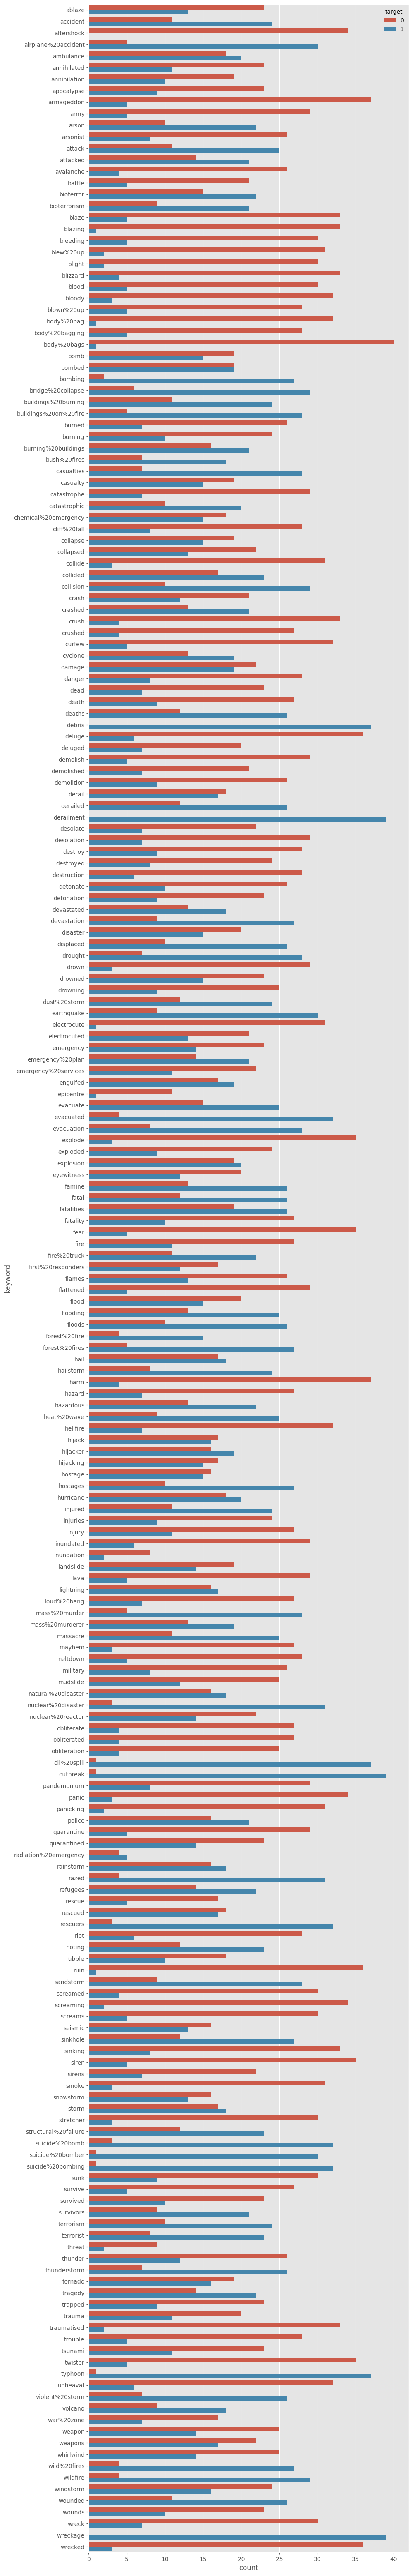

In [18]:
plt.figure(figsize=(10, 80))
sns.countplot(data=train_set_, y = 'keyword', hue='target')

With the previous graphic we can see clearly that the most of the keywords are incoherent with the target. But it seems that special keywords, inversely, represents the disaster target. 

In example: the keyword 'bush fires' cannot be used now because Bush is not actually the president of the USA. 

But it can be usefull for identifying the exaggeration made by the twitters on different disaster. The keyword 'apocalypse' doesn't truely represent the target because it is a unusual case.

#### Shortest and longest tweets

Let's look at the length of the shortest tweet and the length of the longest tweet.

In [ ]:
# create a new column containing the length of the tweets
train_set_['tweet_len'] = train_set_['text'].map(lambda x: len(x))

: 

In [ ]:
# show the min and the max
train_set_['tweet_len'].min()

7

: 

In [ ]:
train_set_['tweet_len'].max()

157

: 

In [ ]:
# let's identify those texts
train_set_[(train_set_['tweet_len'] == 157) | (train_set_['tweet_len'] == 7)]['text'].values

array(["when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????",
       'Crushed', 'Bad day', 'Err:509'], dtype=object)

: 

It seems that those tweets may be outliers let's take the tweets that are in the interval that we can identify by looking at the box plot of the tweet length.

<AxesSubplot: >

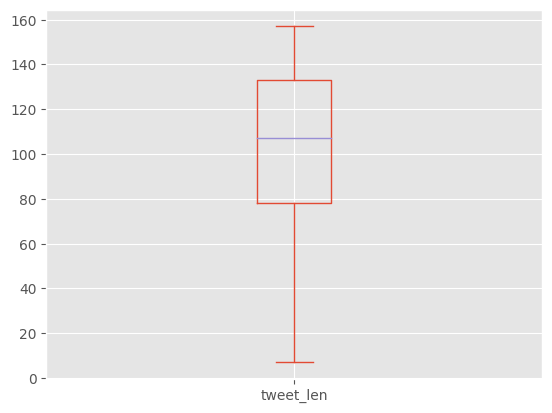

: 

In [ ]:
train_set_['tweet_len'].plot(kind="box")

In [ ]:
# let's calculate the limitations 
l_high = train_set_['tweet_len'].quantile(0.75) + 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))
l_low = train_set_['tweet_len'].quantile(0.25) - 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))

: 

In [ ]:
l_high, l_low

(215.5, -4.5)

: 

The limitations are higher and lower that the max length and the min length so those tweets doesn't represent outliers.

#### Identify targets with only text

Let's take randomly some tweets and verify if they represent their targets.

In [ ]:
train_set_[['text', 'target']].sample(100)

,text,target
4835,The media needs to stop publicizing mass murde...,0
7584,These boxes are ready to explode! Exploding Ki...,0
4646,FB page of Bushman Safari's Zimbabwe the compa...,0
4726,@YoungHeroesID Lava Blast &amp; Power Red @die...,0
4070,Firefighting consumes Forest Service budget sp...,1
932,'If a truckload of soldiers will be blown up n...,1
6106,If there's a chance will get a gander of the s...,0
2732,???????????? @MikeParrActor absolutely devasta...,0
6602,Truth...\nhttps://t.co/beJfTYgJIL\n#News\n#BBC...,0
1000,#OVOFest Drake straight body bagging Meek on t...,0


: 

We can identify easily, as human we are, the target of a tweet.

#### Identification of the patterns

Some words are commonly used in tweets that do not represent disaster events like 'drink', 'happy', '????', text containing more special symbols, or just words identifying happiness where other texts can be very useful to identify a disaster event. They may be the more saddest or shortest tweets: They contains some words like 'evacuation', 'falls' or more professional words used only by the people working on disaster events like practical nurse or government agents.

#### Human prediction

A human would certainly predict the target of a tweet very easily. The accuracy of a human prediction would be higher than 80%: -20% because some tweets can just contains deep jokes that cannot be interpret as they are (not a disaster) or can be contains bad writings even if they are serious.

### Text Processing

### Preprocessing

Before going through the processing we must make some preprocessing on the data frame.

The first thing to do is to replace missing values by commas since the columns containing missing values are of type object.

In [ ]:
train_set_.dtypes

id            int64
keyword      object
location     object
text         object
target        int64
tweet_len     int64
dtype: object

: 

They are, in particular, keyword and location.

In [ ]:
train_set_.fillna('', inplace = True)

: 

We can also only remove the observations for which we find missing values but they may contain some important information about the targets.

Let's remove the location and id columns which do not make any interest to the purpose. 

In [ ]:
train_set_.drop(columns=['id', 'location'], axis=1, inplace=True)

: 

The keyword column may be deleted due to the incoherence between some values and the target. But we will keep it until exploring more deeply the data.

#### Tokenization and text cleaning

Let's create a function that we will apply on the text column. We will work only on that column. Let's recuperate it as a list.

In [ ]:
texts = train_set_['text']

: 

In [ ]:
texts

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

: 

In [ ]:
# transform to list
texts = texts.tolist()

: 

We have to recuperate english stop words before doing the main staff.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

: 

In [ ]:
en_stopwords = set(stopwords.words('english'))

: 

Let's create the function.

In [ ]:
# We transform each document to tokens and remove stopwords and 
# words with length less than 3 in one single line
text_transformation = lambda text, tokenizer, stop_words: [text_ for\
    text_ in tokenizer.tokenize(text.lower())\
        if text_ not in stop_words and len(text_) > 3]

def pre_transformation(texts, stop_words: list, regexp:str = r"\w+"):
    tokenizer = RegexpTokenizer(regexp)
    
    tokens = []
    for text in tqdm(texts):
        tokens.append(text_transformation(text, tokenizer, stop_words))
    
    return tokens

: 

Let's apply the transformation on the texts.

In [ ]:
new_texts = pre_transformation(texts, en_stopwords)

100%|██████████| 7613/7613 [00:00<00:00, 43704.96it/s]


: 

#### Create a corpus containing all the texts

To create a corpus of all the texts we just need to add the documents (or tokens) in one single list of tokens.

In [ ]:
corpus = []
for document in tqdm(new_texts):
    
    corpus.extend(document)

100%|██████████| 7613/7613 [00:00<00:00, 411156.50it/s]


: 

It's possible to use the nltk Text class to make interesting search and analyzes. 

In [ ]:
corpus_text = nltk.text.Text(corpus)

: 

In [ ]:
# print the length of the corpus
len(corpus)

69943

: 

It contains 69943 words. We can make the corpus to be a one single text by using the usefully `join` function.

In [ ]:
text_corpora = " ".join(corpus)

: 

#### How many unique tokens 

Let's count the number of unique tokens that we obtained with the vocab function from the corpus.

In [ ]:
freqs = corpus_text.vocab()

: 

In [ ]:
# Let's print the number of unique words
len(freqs)

19893

: 

The number of unique words is very large. We must reduce this number by using the word frequencies.

#### Reduce the number of tokens

To reduce the number of tokens we can to remove the most common words, i.e words appearing more frequently in the vocabulary. We can also use stemming or lemming to delete suffixes and prefixes or to obtain more simple form of the words.

Let's plot a box to verify the outlier limitations.

In [ ]:
frequency = pd.DataFrame.from_dict(freqs, 'index')
frequency.rename({0: 'frequency'}, inplace=True, axis=1)

: 

In [ ]:
frequency.head()

,frequency
deeds,2
reason,20
earthquake,50
allah,9
forgive,2


: 

recuperate index as column to select important words

In [ ]:
frequency.reset_index(level=0, inplace=True)

: 

Let's use a another library for the new box plot.

In [ ]:
px.box(data_frame=frequency, x="frequency", hover_data=['index', 'frequency'])

: 


Some words have a very high number of apparition. Let's recuperate, numerically, the limitations.

In [ ]:
def guess_limitations(data_frame: pd.DataFrame, column: str):
    q1 = data_frame[column].quantile(0.25)
    q3 = data_frame[column].quantile(0.75)
    eq = q3 - q1
    limit1 = q1 - 1.5 * eq
    limit2 = q3 + 1.5 * eq
    return limit1, limit2

: 

In [ ]:
guess_limitations(frequency, 'frequency')

(-0.5, 3.5)

: 

But we can also not use the outliers limitations and choose our own bounds. That's because some outliers may be interesting since they are not really outliers but unusual words.

It seems that the most interesting words have frequencies standing bellow 400. So let's delete the words which are above that and make some investigations. 

In [ ]:
# With pandas boolean indexing
# frequency_2 = frequency[frequency['frequency'] <400]

: 

In [ ]:
# With nltk Counter
freq_total = nltk.Counter(freqs)

: 

In [ ]:
stopwords_common = list(zip(*freq_total.most_common(400)))[0]

: 

In [ ]:
stopwords_common[:20]

('http',
 'https',
 'like',
 'fire',
 'people',
 'news',
 'video',
 'disaster',
 'emergency',
 'police',
 'would',
 'body',
 'still',
 'california',
 'storm',
 'burning',
 'back',
 'crash',
 'suicide',
 'time')

: 

We can see with only 20 displayed most common words that some of them maybe useful and that we cannot delete all of them. 

#### Tokens appearing one time

Let's see how many tokens appear only one time in the data frame.

In [ ]:
frequency[frequency['frequency'] == 1].shape[0]

14107

: 

In [ ]:

one_time_frequency = frequency[frequency['frequency'] == 1]


: 

Let's display randomly some of those words to verify their importance.

In [ ]:

one_time_frequency.iloc[np.random.randint(0, one_time_frequency.shape[0], 100).tolist(),:]

,index,frequency
5279,reined,1
9992,mbo6oaniqi,1
11891,racer,1
9438,apts,1
9976,hkbpqdncba,1
19678,strip,1
16316,rainy,1
14096,indot,1
10406,cochrane,1
14811,worseits,1


: 

Most of the words doesn't mean anything. So it's crucial do delete them from the data frame.

In [ ]:

new_frequency = frequency.loc[~frequency['index'].isin(one_time_frequency['index'].to_list()), :]

: 

#### Apply a stemming or a lemmatization method

The preferable approach is the lemmatization which take the basic form of each word from an internal dictionary of `nltk`.

Let's apply the lemmatization on the corpus.

In [ ]:
new_frequency = new_frequency.copy()

: 

In [ ]:
# create the lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

: 

In [ ]:
new_frequency.head()

,index,frequency
0,deeds,2
1,reason,20
2,earthquake,50
3,allah,9
4,forgive,2


: 

In [ ]:
new_frequency.loc['index'] = new_frequency['index'].apply(lambda idx: lemmatizer.lemmatize(idx))

: 

In [ ]:
# Let's print the head of the data frame
new_frequency.head()

,index,frequency
0,deeds,2.0
1,reason,20.0
2,earthquake,50.0
3,allah,9.0
4,forgive,2.0


: 

It seems that some lines contains missing data since the type of the frequency column change to float.

Let's count the number of missing values.

In [ ]:
new_frequency.isnull().sum()

index        1
frequency    1
dtype: int64

: 

We found only one missing observation due to a bad lemmatization. We have to remove it from the data frame.

In [ ]:
new_frequency.dropna(axis=0, inplace=True)

: 

Let's change the type of the frequency column to int.

In [ ]:
new_frequency['frequency'] = new_frequency['frequency'].astype('int32')

: 

Reset index column as index.

In [ ]:
new_frequency.set_index('index', inplace = True)

: 

Recuperate data frame as dictionary.

In [ ]:
new_frequency = new_frequency.to_dict()

: 

In [ ]:
new_frequency = new_frequency['frequency']

: 

Transform dictionary to FreqDist.

In [ ]:
new_freqs = nltk.FreqDist(new_frequency)

: 

In [ ]:
new_freqs

FreqDist({'http': 4309, 'https': 411, 'like': 348, 'fire': 254, 'people': 200, 'news': 197, 'video': 165, 'disaster': 158, 'emergency': 158, 'police': 143, ...})

: 

In [ ]:
len(new_freqs)

5786

: 

#### Word Cloud 

The wordcloud show us the most common words in the corpus.

In [ ]:
from wordcloud import WordCloud

: 

To make a wordcloud we must consider the text as a whole and not the tokenized version so let's use join the words.

Let's create a function which get a text from a freqDist

In [ ]:
from typing import Union

: 

In [ ]:
def get_text_from_freqs(freqs: Union[nltk.FreqDist, dict]):
    words = []
    for word in tqdm(new_freqs.keys()):
        words.extend([word]*new_freqs[word])
    text_corpus = " ".join(words)
    return text_corpus

: 

In [ ]:
text = get_text_from_freqs(new_freqs)

100%|██████████| 5786/5786 [00:00<00:00, 1044424.30it/s]


: 

Let's create another function for creating a wordcloud.

In [ ]:
def wordcloud(text: str):
    plt.figure(figsize=(8, 8))
    
    word_cloud = WordCloud(max_font_size=60, max_words=100, background_color="white").generate(text)
    
    plt.imshow(word_cloud)
    
    plt.axis('off')
    
    plt.show()
    

: 

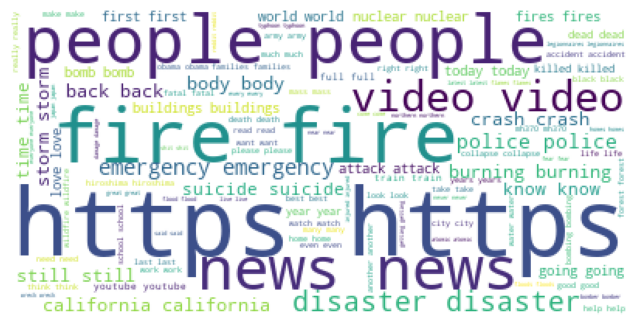

: 

In [ ]:
wordcloud(text)


The most common words in the corpus are https, people, fire, video, news, disaster, emergency for the top 7. We observe behind them interesting words which can add interesting information about the target of the tweets.

#### Stack processing steps to create a more pertinent new text column

Let's create a class which will help us to create a more pertinent text column.

In [107]:
class TextPipeProcessing:
    """The pipeline is composed by (* are obligatory processing):
    - tokenize_text*
    - create_corpus*
    - print_frequency*
    - print_frequency_out_limits
    - print_most_common_words
    - print_n_time_frequency_words
    - delete_n_time_frequency_words
    - lemmatize_words
    - recuperate_results*
    - plot_wordcloud
    - add_results_to_data_frame*
    """
    def __init__(self, data_frame, text_column: str):
        
        self.data_frame = data_frame
        
        self.text_column = text_column
    
    def tokenize_text(self, language: str = 'english', regex: str = r"\w+"):
        
        texts = self.data_frame[self.text_column]
        
        texts = texts.tolist()
        
        self.stopwords = set(stopwords.words(language))
        
        self.tokens = pre_transformation(texts, self.stopwords)
    
        return self.tokens
        
    def create_corpus(self):
        self.corpus = []
        for document in tqdm(new_texts):
            
            self.corpus.extend(document)
        
        self.corpus_text = nltk.text.Text(corpus)
        
        print(f"Number of words: {len(self.corpus):->16}")
        print(f"Number of unique words: {len(self.corpus_text.vocab()):->16}")
        
        return self.corpus, self.corpus_text
    
    def print_frequency(self):
        self.frequency = pd.DataFrame.from_dict(self.corpus_text.vocab(), 'index')
        
        self.frequency.rename({0: 'frequency'}, inplace=True, axis=1)
        
        self.frequency.reset_index(level=0, inplace=True)
        
        print(self.frequency.head())
    
    def print_frequency_out_limits(self):
        px.box(data_frame=self.frequency, x="frequency", hover_data=['index', 'frequency']) 
        
        self.low, self.high = guess_limitations(self.frequency, 'frequency') 
        
        print(f"Low limit: {self.low:->16}")
        print(f"High limit: {self.high:->16}")
    
    def print_most_common_words(self, lower_bound: int = 400, n_words: int = 20):
        self.freq_total = nltk.Counter(self.corpus_text.vocab())
        
        self.stopwords_common = list(zip(*freq_total.most_common(lower_bound)))[0]
        
        print("Most common words are:")
        print(self.stopwords_common[:20])
    
    def print_n_time_frequency_words(self, n_time_freq: int = 1, n_words: int = 100):
        
        self.frequency[self.frequency['frequency'] == n_time_freq].shape[0]
        
        n_time_frequency = self.frequency[self.frequency['frequency'] == n_time_freq]
        
        print(n_time_frequency.iloc[:n_words,:])
    
    def delete_n_time_frequency_words(self, n_time_freq: int = 1):
        
        n_time_frequency = self.frequency[self.frequency['frequency'] == n_time_freq]
        
        self.new_frequency = self.frequency.loc[~self.frequency['index'].isin(n_time_frequency['index'].to_list()), :]
        
        print("The new frequency data frame is stored in `new_frequency` variable.")
        
        print(f"The number of deleted observations: {n_time_frequency.shape[0]:->16}")
        
    def lemmatize_words(self, lemmatizer):
        
        self.new_frequency = self.new_frequency.copy()
        
        self.new_frequency.loc['index'] = self.new_frequency['index'].apply(lambda idx: lemmatizer.lemmatize(idx))
        
        self.new_frequency.dropna(axis=0, inplace=True)
        
        self.new_frequency['frequency'] = self.new_frequency['frequency'].astype('int32')
    
    def recuperate_results(self):
        try:
            frequency = self.new_frequency.copy()
        except:
            frequency = self.frequency.copy()
        finally:
            print("The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!")
        
        frequency.set_index('index', inplace = True)
        
        frequency = frequency.to_dict()
        
        frequency = frequency['frequency']
        
        self.results = nltk.FreqDist(frequency)
        
        return self.results
    
    def plot_wordcloud(self):
        try:
            text = get_text_from_freqs(self.results)
            wordcloud(text)
        except:
            raise AttributeError("You have to call `recuperate_results` method before plotting the wordcloud!")
    
    def add_results_to_data_frame(self, new_text_column_name: Union[str, None] = None):
        
        if not new_text_column_name: new_text_column_name = self.text_column
        
        def modify_text_column(index):
            
            tokens = self.tokens[index]
            
            for idx, token in enumerate(tokens):
                if token in self.results:
                    tokens[idx] = token
            
            return " ".join(self.tokens[index])
        
        self.data_frame[new_text_column_name] = self.data_frame.index.map(modify_text_column)
            
            
            
      

Let's apply the pipelined text processing class to the data frame.

In [108]:
process_text = TextPipeProcessing(train_set_, 'text')

In [109]:
tokens = process_text.tokenize_text()

100%|██████████| 7613/7613 [00:00<00:00, 64934.67it/s]


In [112]:
corpus = process_text.create_corpus()

100%|██████████| 7613/7613 [00:00<00:00, 1935461.05it/s]

Number of words: -----------69943


TypeError: unhashable type: 'list'

In [111]:
process_text.print_frequency()

TypeError: unhashable type: 'list'

In [ ]:
process_text.print_frequency_out_limits()

Low limit: -------------0.5
High limit: -------------3.5


: 

In [ ]:
process_text.print_most_common_words()

Most common words are:
('http', 'https', 'like', 'fire', 'people', 'news', 'video', 'disaster', 'emergency', 'police', 'would', 'body', 'still', 'california', 'storm', 'burning', 'back', 'crash', 'suicide', 'time')


: 

In [ ]:
process_text.delete_n_time_frequency_words()

The new frequency data frame is stored in `new_frequency` variable.
The number of deleted observations: -----------14107


: 

In [ ]:
process_text.lemmatize_words(lemmatizer)

: 

In [ ]:
results = process_text.recuperate_results()

The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!


: 

100%|██████████| 5786/5786 [00:00<00:00, 653848.55it/s]


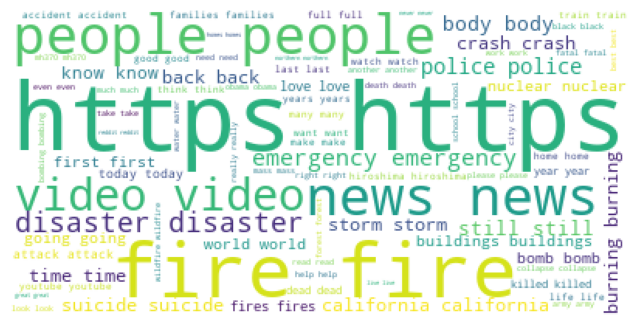

: 

In [ ]:
process_text.plot_wordcloud()

In [ ]:
process_text.add_results_to_data_frame('new_text')

5it [00:00, 4997.98it/s]
6it [00:00, ?it/s]
11it [00:00, ?it/s]
6it [00:00, ?it/s]
8it [00:00, ?it/s]
10it [00:00, ?it/s]
12it [00:00, ?it/s]
3it [00:00, ?it/s]
6it [00:00, ?it/s]
4it [00:00, 4017.53it/s]
5it [00:00, ?it/s]
14it [00:00, ?it/s]
8it [00:00, ?it/s]
5it [00:00, ?it/s]
5it [00:00, ?it/s]
0it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, 1691.25it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, 4485.09it/s]
6it [00:00, ?it/s]
8it [00:00, ?it/s]
2it [00:00, ?it/s]
8it [00:00, 7991.05it/s]
10it [00:00, ?it/s]
6it [00:00, ?it/s]
13it [00:00, 10134.94it/s]
2it [00:00, ?it/s]
10it [00:00, ?it/s]
5it [00:00, 4957.81it/s]
13it [00:00, ?it/s]
4it [00:00, ?it/s]
7it [00:00, ?it/s]
9it [00:00, ?it/s]
9it [00:00, 8998.51it/s]
7it [00:00, ?it/s]
10it [00:00, 6753.03it/s]
14it 

KeyboardInterrupt: 

: 

In [ ]:
train_set_.head()

,keyword,text,target,tweet_len,new_text
0,,Our Deeds are the Reason of this #earthquake M...,1,69,deeds reason earthquake allah forgive
1,,Forest fire near La Ronge Sask. Canada,1,38,forest fire near ronge sask canada
2,,All residents asked to 'shelter in place' are ...,1,133,residents asked shelter place notified officer...
3,,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfires evacuation orders cal...
4,,Just got sent this photo from Ruby #Alaska as ...,1,88,sent photo ruby alaska smoke wildfires pours s...


: 

Let's count the occurrence of each target class.

In [ ]:
train_set_['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

: 

The occurrence of class 0 (no disaster) is more important than that of class 1 (disaster).

Some text can contains only commas since we delete many words in the corpus. So let's recount the length of the texts.

In [ ]:
train_set_['new_tweet_len'] = train_set_['new_text'].map(lambda text: len(text))

: 

In [ ]:
train_set_['new_tweet_len'].min()

0

: 

In [ ]:
(train_set_['new_tweet_len'] == 0).sum(), train_set_['']

4

: 

We can see that the new text column contains 4 empty texts. Let's create a new data frame taking only the columns that interests us.

In [ ]:
new_train_set = train_set_[['keyword', 'new_text', 'new_tweet_len', 'target']]

: 

Let's suppress the new text lines containing commas.

In [ ]:
new_train_set = new_train_set[new_train_set['new_tweet_len'] != 0]

: 

In [ ]:
new_train_set.head()

,keyword,new_text,new_tweet_len,target
0,,deeds reason earthquake allah forgive,37,1
1,,forest fire near ronge sask canada,34,1
2,,residents asked shelter place notified officer...,88,1
3,,people receive wildfires evacuation orders cal...,53,1
4,,sent photo ruby alaska smoke wildfires pours s...,51,1


: 